## Marching Cubes Example
(This Lab demands the package [PyMCubes](https://github.com/pmneila/PyMCubes))

In [86]:
import numpy as np
import mcubes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def xyz(x,y,z):
    return [1,x,y,z,x*y,x*z,y*z,x*y*z]

def mxyz(x0,y0,z0,x1,y1,z1):
    return np.array([
        xyz(x0,y0,z0),
        xyz(x1,y0,z0),
        xyz(x0,y1,z0),
        xyz(x1,y1,z0),
        xyz(x0,y0,z1),
        xyz(x1,y0,z1),
        xyz(x0,y1,z1),
        xyz(x1,y1,z1)
    ])

def draw(x0,y0,z0,x1,y1,z1,c,grids = 30):
    a = np.linalg.inv(mxyz(x0,y0,z0,x1,y1,z1)).dot(c)
    
    # trilinear interpolation.
    def fun(x, y, z):
        tmp = np.vstack([np.ones_like(x),x,y,z,x*y,x*z,y*z,x*y*z])
        return tmp.T.dot(a)
    
    # grid size
    n = grids*1j   # is a complex number because mgrid receive complex as imput

    # creating a 3D grid
    X, Y, Z = np.mgrid[-1:1:n,-1:1:n,-1:1:n]

    # defining a function in the grid
    f = fun(X.flatten(),Y.flatten(),Z.flatten())
    f = f.reshape(grids,grids,grids)

    #compyting the isosurface 0
    vertices, triangles = mcubes.marching_cubes(f, 0)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(vertices[:, 0], vertices[:,1], vertices[:, 2], triangles = triangles,
                    cmap='Spectral',edgecolor='Gray',lw=0.1)
    plt.show()
    
x0=y0=z0=-1
x1=y1=z1=1

From the left image we can find that the isosurface meets 6 edges of the cube near the midpoints of these edges. This indicates that the absolute values of all points are almost equal.

<IPython.core.display.Javascript object>


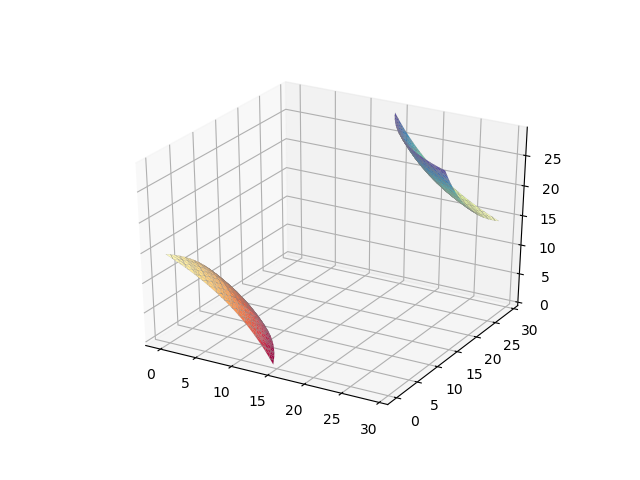

In [87]:
# left image
c000=c111=1
c100=c010=c110=c001=c101=c011=-1
c = np.array([c000,c100,c010,c110,c001,c101,c011,c111]) 

draw(x0,y0,z0,x1,y1,z1,c)

From the middle image we can find that the points where isosurface meet the edges of the cube are much closer to the corners that have negative values of these edges. This means that the positive values in two diagonally opposite corners are much larger than the absolute values of the negative values in the remaining corners. So just keep increasing the value of c000 and c111 until an image similar to the middle one is obtained.

<IPython.core.display.Javascript object>


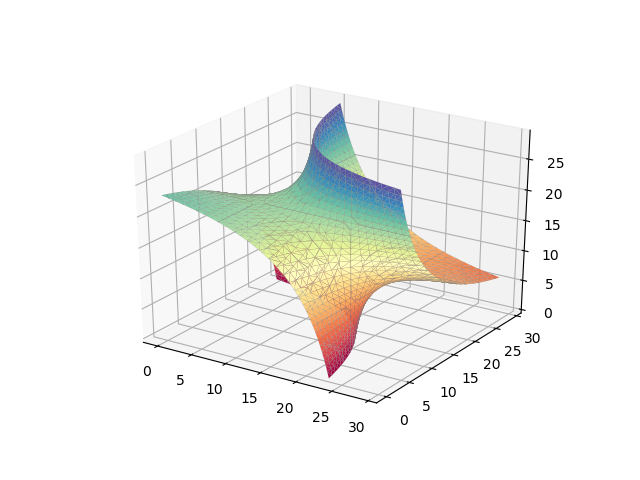

In [90]:
# middle image
c000=c111=4
c100=c010=c110=c001=c101=c011=-1
c = np.array([c000,c100,c010,c110,c001,c101,c011,c111])  

draw(x0,y0,z0,x1,y1,z1,c)

Notice that in the right image, in the 3 faces that contain c100, every point on the 3 diagonals connected to c100 has the same sign as c100. This also holds for c011. So c100 and c011 have larger absolute values than other points

<IPython.core.display.Javascript object>


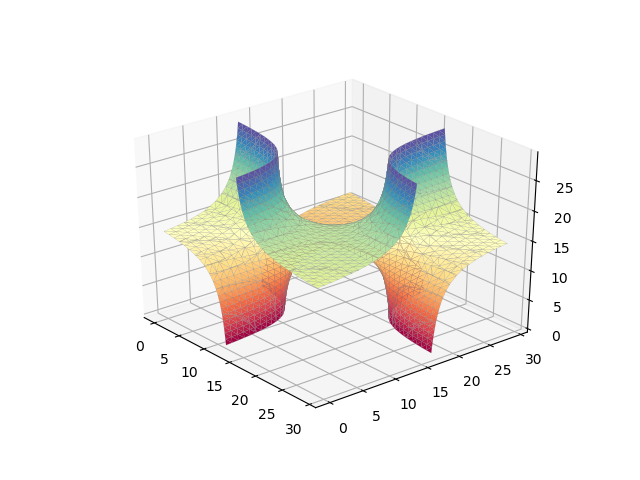

In [89]:
# right image
c000=c110=c101=1
c011=1.5
c001=c111=c010=-1
c100=-1.5

c = np.array([c000,c100,c010,c110,c001,c101,c011,c111]) 

draw(x0,y0,z0,x1,y1,z1,c)